In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import random
seed_constant=27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:
CLASSES_LIST=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
DATASET_DIR=r"C:\Users\ASUS\Desktop\DL\datathon\train_"

In [4]:
IMG_SIZE=224

In [5]:
def create_dataset():
    s = []
    labels = []
    for class_index, class_name in enumerate(CLASSES_LIST):
        files_list = os.listdir("C:/Users/ASUS/Desktop/DL/datathon/train_/"+str(class_name))
        for file_name in files_list:
            path=("C:/Users/ASUS/Desktop/DL/datathon/train_/"+str(class_name)+"/" +file_name)
            image=cv2.resize(cv2.imread(path),(IMG_SIZE,IMG_SIZE))  
            s.append(np.array(image))  
            labels.append(class_index)
    features = np.asarray(s)
    labels = np.array(labels)
    return features, labels
        

In [6]:
features, labels = create_dataset()

In [ ]:

print(features.shape)
print(labels.shape)

In [ ]:
dataset

In [8]:
one_hot_encoded_labels = to_categorical(labels)


In [9]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.056, shuffle = True,
                                                                            random_state=seed_constant
                                                                            )

In [10]:
print(len(labels_train))
print(len(features_test))

15104
896


In [11]:
labels_train=labels_train[:5000]
features_train=features_train[:5000]
labels_test=labels_test[:900]
features_test=features_test[:900]

In [12]:
print(len(labels_train))
print(len(features_test))

5000
896


In [13]:
features_train=features_train/255
features_test=features_test/255


donotrun

In [28]:
data_augmentation = tf.keras.Sequential([
                            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                            
])


In [21]:
path=("C:/Users/ASUS/OneDrive/Desktop/DL/datathon/train_/0/80.tif" )
img=cv2.resize(cv2.imread(path),(IMG_SIZE,IMG_SIZE))  

In [23]:


img = tf.expand_dims(img, 0)

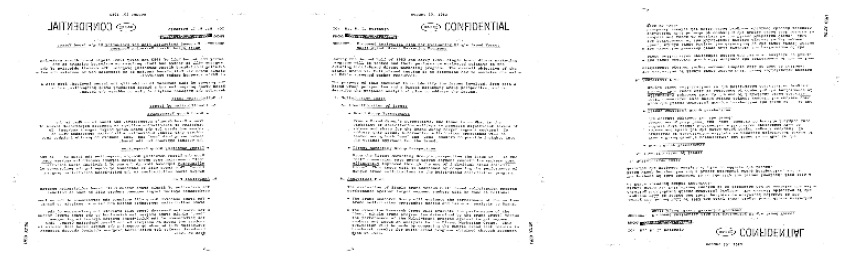

In [34]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')


In [33]:
print(image.shape)
image = tf.expand_dims(image, 0)
print(image.shape)
aug_iter = datagen.flow(image, batch_size=1)

(224, 224, 3)
(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


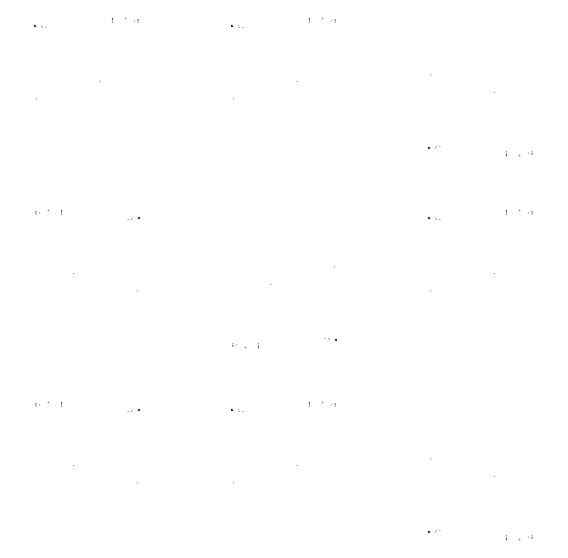

In [30]:
plt.figure(figsize = (10,10))
for i in range(9):
    augmented_image = data_augmentation(img)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

# cnn

In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',  strides=(2, 2), padding="same", input_shape=(224, 224, 3)),

    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64 ,(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.l1( l=0.01)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer =regularizers.l1( l=0.01)),
 
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),kernel_regularizer =regularizers.l1( l=0.01),
    layers.Dropout(0.25),
    layers.Dense(16, activation='softmax')
])

SyntaxError: invalid syntax (1587646326.py, line 18)

In [30]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 64)        0

In [32]:
#early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
cnn.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [37]:
cnn.fit(features_train[:500],labels_train[:500],epochs=20, batch_size = 4 ,shuffle = True,validation_split = 0.25)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropInput' defined at (most recent call last):
    File "C:\Users\ASUS\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ASUS\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ASUS\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\ASUS\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\ASUS\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ASUS\AppData\Local\Temp\ipykernel_22272\1456971235.py", line 1, in <cell line: 1>
      cnn.fit(features_train[:1000],labels_train[:1000],epochs=20, batch_size = 4 ,shuffle = True,validation_split = 0.25)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropInput'
OOM when allocating tensor with shape[19,625,576] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropInput}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1183]

In [23]:
cnn.evaluate(features_test,labels_test)#bs 16 7000

63/63 [==============================] - 6s 82ms/step - loss: 1.5138 - accuracy: 0.5665


[1.5137654542922974, 0.5665000081062317]

In [ ]:
cnn.evaluate(features_test,labels_test)

In [ ]:

model = load_model('my_model2.h5')


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(features_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
labels_train
y_classes = [np.argmax(element) for element in labels_test]
y_classes[:5]

In [37]:
model.evaluate(features_test,labels_test)#bs 4 6000

32/32 [==============================] - 2s 67ms/step - loss: 2.0175 - accuracy: 0.5050


[2.017454147338867, 0.5049999952316284]

In [27]:
y_pred = cnn.predict(features_test)

32/32 [==============================] - 3s 69ms/step


In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[10, 14, 10, 1, 15]

In [29]:
labels_test[:5]
y_classes = [np.argmax(element) for element in labels_test]

In [30]:
y_classes[:5]

[5, 14, 5, 4, 7]